In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time
from tools import *
from optimization import *

plt.rcParams.update({'font.size': 14})


def annealing(num_iterations, cities, T0, alpha, cooling_schedule):
    distances = np.zeros(num_iterations)
    current_itinerary = np.array(range(len(cities)))
    current_length = itinerary_cost(current_itinerary, cities)
    Tcurr = T0
    for step in range(num_iterations):
            current_itinerary, current_length, Tcurr = simulated_annealing_step(cities, current_itinerary, Tcurr, T0, alpha, step, cooling_schedule)
            distances[step] = current_length
    return distances

def run_optimization(runs, num_iterations, cities, T0, alpha, cooling_schedule, cool_name):
    distances_all_steps = np.zeros((runs, num_iterations))
    for i in range(runs):
        distances_all_steps[i]  = annealing(num_iterations, cities, T0, alpha, cooling_schedule)
        print(f'Optimization {i} completed')
    # Save data for each beta
    np.savetxt(f'data/optimization_Ncities={len(cities)}_{cool_name}_alpha={alpha}_runs={num_iterations,}.dat', distances_all_steps, delimiter=',')
    print(f'Batch completed for alpha={alpha}\n')

def cooling_comparisons():
        # We now define the parameters for our optimization
    steps = 1000
    T0 = 100
    alphas = [T0/steps, 100., 0.85, 0.85]
    cooling_schedules = [cooling_linear_m, cooling_logarithmic_m, cooling_exponential_m, cooling_quadratic_m]
    cooling_schedules_names = ['Linear', 'Logarithmic', 'Exponential', 'Quadratic']


def annealing_skyrim(num_iterations, cities, T0, alpha, cooling_schedule):
    distances = np.zeros(num_iterations)
    current_itinerary = np.array(range(len(cities)))
    current_length = itinerary_cost(current_itinerary, cities)
    best_itinerary = current_itinerary.copy()
    best_length = current_length
    Tcurr = T0

    for step in range(num_iterations):
        current_itinerary, current_length, Tcurr = simulated_annealing_step(
            cities, current_itinerary, Tcurr, T0, alpha, step, cooling_schedule
        )
        distances[step] = current_length

        # Check if the new itinerary is better than the best found so far
        if current_length < best_length:
            best_itinerary = current_itinerary.copy()
            best_length = current_length

    return distances, best_itinerary

# SKYRIM

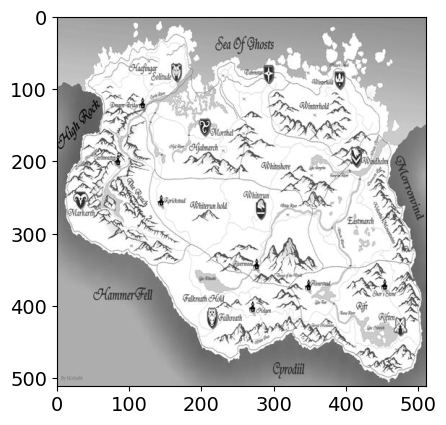

In [399]:
import matplotlib.pyplot as plt
import numpy as np
img = plt.imread("figures/skyrim.jpeg")
fig, ax = plt.subplots()
ax.imshow(img, cmap='gray')

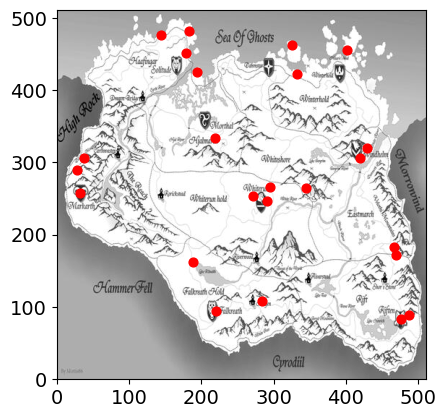

In [400]:
im = plt.imread("figures/skyrim.jpeg")
# We will load the image but plot it upside down
im_flipped = np.flipud(im)
implot = plt.imshow(im_flipped, origin='lower', cmap='gray')

x = np.array([32,28,37,144,183,179,194,219,188,220,284,291,272,295,345,332,325,401,420,429,467,470,476,487])
y = 512-np.array([255,223,206,36,30,61,87,178,350,418,404,266,259,246,248,90,50,56,206,192,329,341,429,424])
# put a red dot, size 40, at 2 locations:
plt.scatter(x, y, c='r', s=40)
plt.show()

In [401]:


# Normalie distances
x_norm = x/512
y_norm = y/512

# Define paremetrs for optimization
np.random.seed(42) 
num_iterations = 5000
alpha = 300
T0 = 100
cooling_schedule = cooling_logarithmic_m
cities = np.array([x_norm, y_norm]).T
np.random.shuffle(cities) 
N = len(cities)

# Run optimization
distances, best_itinerary = annealing_skyrim(num_iterations, cities, T0, alpha, cooling_schedule)



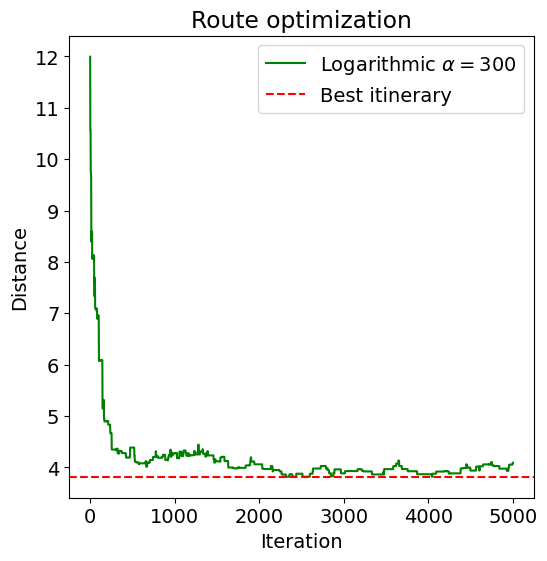

In [404]:
plt.figure(figsize=(6,6))
plt.plot(distances, color = 'green', label = fr'Logarithmic $\alpha=${alpha}')
# add line of best itinerary, it is a horizontal line at the cost of the best itinerary
plt.axhline(y=itinerary_cost(best_itinerary, cities), color='red', linestyle='--', label='Best itinerary')
plt.xlabel('Iteration')
plt.ylabel('Distance')
plt.title('Route optimization')
plt.legend()
plt.show()


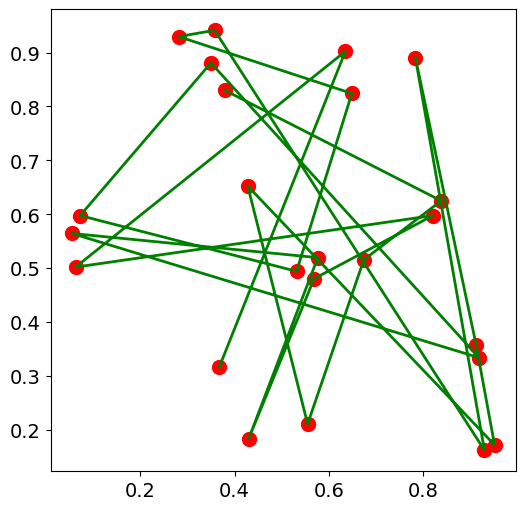

In [359]:
# Now let's plot the final itinerary and scale it back to the original image
plt.figure(figsize=(6,6))
plt.plot(cities[np.array(range(N))][:,0], cities[np.array(range(N))][:,1], color = 'green', linewidth=2)
plt.scatter(cities[np.array(range(N))][:,0], cities[np.array(range(N))][:,1], color = 'red', s=100)

(-0.5, 511.5, -0.5, 511.5)

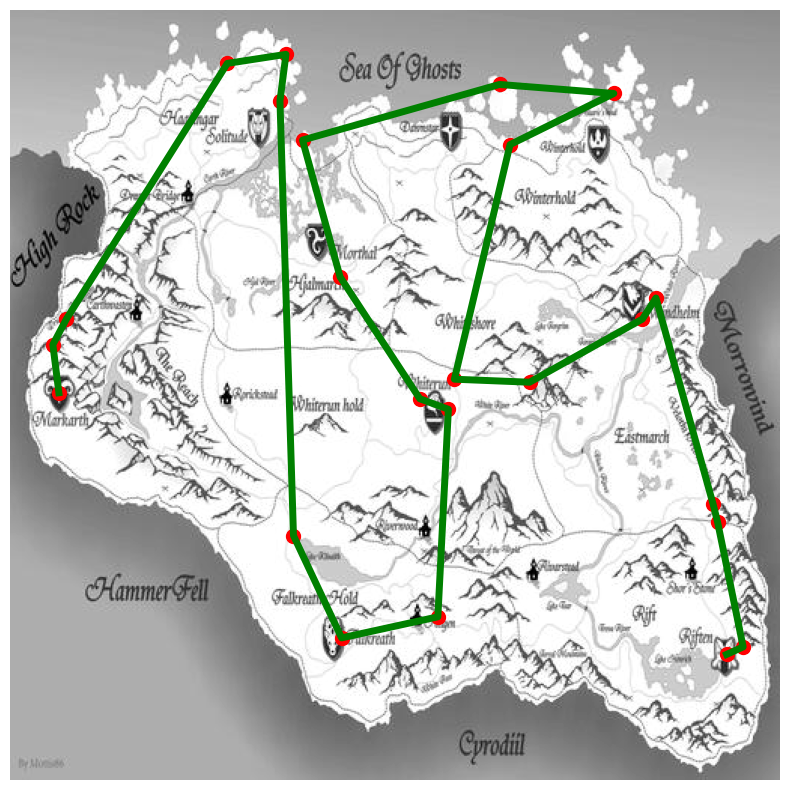

In [408]:
# Now let's plot the best itinerary
plt.figure(figsize=(10, 10))
plt.plot(512*cities[best_itinerary][:,0], 512*cities[best_itinerary][:,1], color = 'green', linewidth=5)
plt.scatter(512*cities[best_itinerary][:,0], 512*cities[best_itinerary][:,1], color = 'red', s=100)
# and plot map behind
plt.imshow(im_flipped, origin='lower', cmap='gray')
plt.axis('off')


Iteration 0. Current T=100.0
Iteration 1. Current T=0.47859678294518637
Iteration 2. Current T=0.3024952653542978
Iteration 3. Current T=0.23987240227281872
Iteration 4. Current T=0.20668357909290316
Iteration 5. Current T=0.18569142099935196
Iteration 6. Current T=0.1710065142425713
Iteration 7. Current T=0.16004290109905694
Iteration 8. Current T=0.15147673765691158
Iteration 9. Current T=0.1445555616918466
Iteration 10. Current T=0.13881782537578619
Iteration 11. Current T=0.13396349853489156
Iteration 12. Current T=0.1297884125170693
Iteration 13. Current T=0.12614839206303174
Iteration 14. Current T=0.12293846632166953
Iteration 15. Current T=0.12008022079154294
Iteration 16. Current T=0.11751378392267363
Iteration 17. Current T=0.1151925724371948
Iteration 18. Current T=0.11307974225820025
Iteration 19. Current T=0.11114572904568565
Iteration 20. Current T=0.10936650497006938
Iteration 21. Current T=0.10772231826752902
Iteration 22. Current T=0.10619676554440056
Iteration 23. Cur

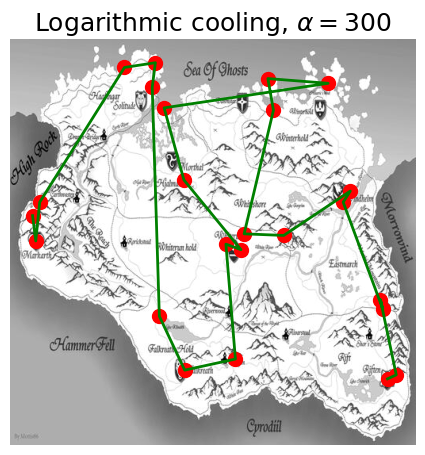

In [412]:
import imageio
def create_gif(num_images ,cities, num_iterations, T0, cool_schedule, cool_name, cool_rate):# Example usage
    N = len(cities)
    frames = []
    fig, ax = plt.subplots()
    Tcurr = T0
    current_itinerary = np.array(range(N))
    current_length = itinerary_cost(current_itinerary, cities)
    for i in range(num_iterations):
        if i % (num_iterations//num_images) == 0:
            ax.clear()
            ax.scatter(512*cities[:, 0], 512*cities[:, 1], color = 'r', s=100)
            ax.plot(512*cities[current_itinerary, 0], 512*cities[current_itinerary, 1], color = 'green', linewidth=2)
            ax.imshow(im_flipped, origin='lower', cmap='gray')
            ax.axis('off')
            ax.set_title(f"{cool_name} cooling, $\\alpha={cool_rate}$")
            ax.set_xticks([])
            ax.set_yticks([])
            plt.tight_layout()
            fig.canvas.draw()
            frame = np.array(fig.canvas.renderer.buffer_rgba())
            frames.append(frame)

        # Run one iteration of simulated annealing
        current_itinerary, current_length, Tcurr = simulated_annealing_step(cities, current_itinerary, Tcurr, T0, cool_rate, i, cool_schedule)
        print(f'Iteration {i}. Current T={Tcurr}')

    # Save frames as a GIF
    imageio.mimsave(f'figures/skyrim_N={N}_{cool_name}_alpha={cool_rate}.gif', frames, fps=num_images//10)


plt.rcParams.update({'font.size': 15})
x = np.array([32,28,37,144,183,179,194,219,188,220,284,291,272,295,345,332,325,401,420,429,467,470,476,487])
y = 512-np.array([255,223,206,36,30,61,87,178,350,418,404,266,259,246,248,90,50,56,206,192,329,341,429,424])
x_norm = x/512
y_norm = y/512
np.random.seed(42) 
num_iterations = 5000
alpha = 300
T0 = 100
cooling_schedule = cooling_logarithmic_m
cities = np.array([x_norm, y_norm]).T
np.random.shuffle(cities) 
N = len(cities)
num_iterations = 5000
num_images = 200
initial_temperature = 100
create_gif(num_images ,cities, num_iterations, initial_temperature, cooling_schedule, 'Logarithmic', alpha)

# Introduction

## Polygone

In [ ]:
# We plot a polygone using our function
N = 9
points = regular_polygon_vertices(apothem=0.4, num_sides=N, center=(0.5, 0.5))
plt.figure()
plt.scatter(points[:, 0], points[:, 1], c='r')
plt.plot(points[:, 0], points[:, 1], c='k')
plt.xlim(0, 1)
plt.ylim(0, 1)
# force aspect ratio 1
plt.gca().set_aspect('equal', adjustable='box')
# make numbers bigger
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

## Norm comparison

In [ ]:
# let us import time it function
from timeit import timeit

# Let's compare all three costs for sets of 10 cities, but they calculate the cost M times
N = 20
M = [10**i for i in range(1, 6)]

# Create points
points = np.random.rand(N, 2)

points_spherical = np.zeros((N, 2))
points_spherical[:, 0] = np.arccos(2 * np.random.rand(N) - 1)
points_spherical[:, 1] = np.random.rand(N) * 2 * np.pi


euclidean_runtime = np.zeros(len(M))
for i, m in enumerate(M):
    start = time.time()
    for j in range(m):
        cost_euclidean(points)
    end = time.time()
    euclidean_runtime[i] = end - start

taxicab_runtime = np.zeros(len(M))
for i, m in enumerate(M):
    start = time.time()
    for j in range(m):
        cost_taxicab(points)
    end = time.time()
    taxicab_runtime[i] = end - start

spherical_runtime = np.zeros(len(M))
for i, m in enumerate(M):
    start = time.time()
    for j in range(m):
        cost_spherical(points_spherical)
    end = time.time()
    spherical_runtime[i] = end - start


In [ ]:
plt.figure(figsize=(5,5))
plt.plot(M, euclidean_runtime, label='Euclidean', color = 'k')
plt.plot(M, taxicab_runtime, label='Taxicab', color = 'r')
plt.plot(M, spherical_runtime, label='Spherical', color = 'g')
plt.xlabel('N')
plt.ylabel('Time (s)')
plt.xscale('log')
plt.legend()
plt.show()

## Temperature behaviour

# Methodology

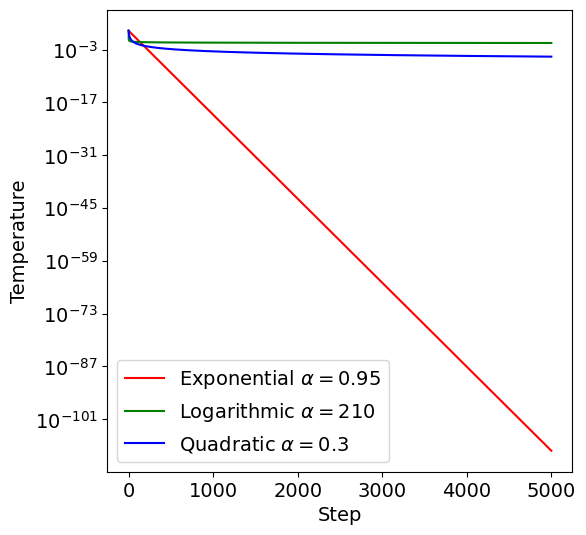

In [3]:
from optimization import *
# Let us plot all cooling schedules
T0 = 100
schedules = [cooling_exponential_m, cooling_logarithmic_m, cooling_quadratic_m]
names = ['Exponential', 'Logarithmic', 'Quadratic']
colorsav = ['red', 'green', 'blue']
colors = ['lightcoral', 'lightgreen', 'lightblue']
alphas = [0.95, 240, 0.3]
num_steps = 5000
exponential = np.array([cooling_exponential_m(T0, alphas[0], step) for step in range(num_steps)])
logarithmic = np.array([cooling_logarithmic_m(T0, alphas[1], step) for step in range(num_steps)])
quadratic = np.array([cooling_quadratic_m(T0, alphas[2], step) for step in range(num_steps)])
# Now normalize so that the first point is 1 and the last one is 0

plt.figure(figsize=(6,6))
# Plot against step percentage
x = np.array(range(num_steps))
plt.plot(x, exponential, label=fr'{names[0]} $\alpha=${alphas[0]}', color = colorsav[0])
plt.plot(x, logarithmic, label=fr'{names[1]} $\alpha=${alphas[1]}', color = colorsav[1])
plt.plot(x, quadratic, label=fr'{names[2]} $\alpha=${alphas[2]}', color = colorsav[2])
#also labels

plt.xlabel('Step')
plt.ylabel('Temperature')
plt.yscale('log')
plt.legend()
plt.show()


1


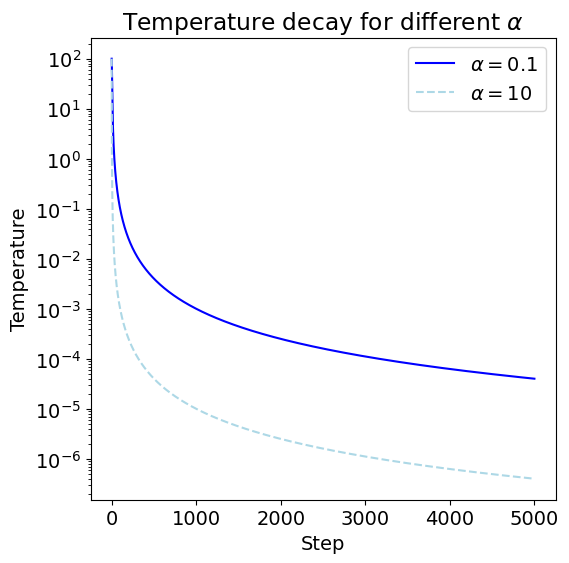

In [396]:
k=2
alphas = [[0.9, 300, 10],[0.99, 50, 0.1]]
slow = 1
fast = 0
num_steps = 5000
cool = schedules[k]

slow_plot = np.array([cool(T0, alphas[slow][k], step) for step in range(num_steps)])
fast_plot = np.array([cool(T0, alphas[fast][k], step) for step in range(num_steps)])
print(slow)
# Now plot the same but with different alpha values

plt.figure(figsize=(6,6))
x = np.array(range(num_steps))
plt.plot(x, slow_plot, label=fr'$\alpha=${alphas[slow][k]}', color = colorsav[k])
plt.plot(x, fast_plot, label=fr'$\alpha=${alphas[fast][k]}', color = colors[k], linestyle='--')
plt.title(r'Temperature decay for different $\alpha$')
plt.xlabel('Step')
plt.ylabel('Temperature')
plt.yscale('log')
plt.legend()
plt.show()





1


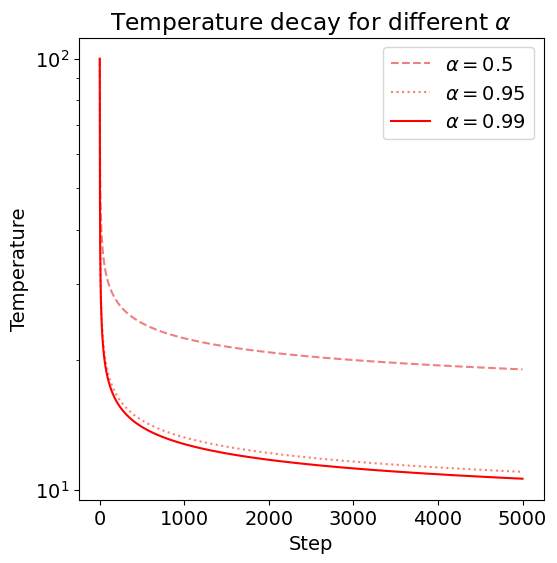

In [393]:
k=0
alphas = [0.5,0.95,0.99]
num_steps = 5000
cool = schedules[k]
print(slow)
# Now plot the same but with different alpha values
# three shades of red
colors = ['lightcoral', 'salmon', 'red']
# three line styles
linestyles = [ '--', ':','-']

plt.figure(figsize=(6,6))
x = np.array(range(num_steps))
for i, alpha in enumerate(alphas):
    plt.plot(x, np.array([cool(T0, alpha, step) for step in range(num_steps)]), label=fr'$\alpha=${alpha}', color = colors[i], linestyle=linestyles[i])
plt.title(r'Temperature decay for different $\alpha$')
plt.xlabel('Step')
plt.ylabel('Temperature')
plt.yscale('log')
plt.legend()
plt.show()

# Analysis

In [366]:
plt.rcParams.update({'font.size': 14})
# Create cities
N = 20
np.random.seed(42) 
cities = regular_polygon_vertices(apothem=0.4, num_sides=N, center=(0.5, 0.5))
np.random.shuffle(cities) 
slow = 1
fast = 0
superfast = 2

# Cooling 
schedules = [cooling_exponential_m, cooling_logarithmic_m, cooling_quadratic_m]
names = ['Exponential', 'Logarithmic', 'Quadratic']
colorsav = ['red', 'green', 'blue']
colors = ['lightcoral', 'lightgreen', 'lightblue']
alphas = [[0.9, 300, 10],[0.99, 50, 0.1],[0.5, 0.5, 0.5]]

In [367]:
# Choose cooling schedule
k = 0
state = fast

color = colors[k]
colorav = colorsav[k]
cool_schedule = schedules[k]
cool_name = names[k]
alpha = alphas[state][k]

# Run parameters
num_iterations = 5000
num_images = 200
initial_temperature = 150

# Create data
runs = 100
T0 = 100

In [ ]:
# Now let us plot the average slow alongside the average fast

distances_all_steps_slow = np.loadtxt(f'data/optimization_Ncities={len(cities)}_{cool_name}_alpha={alphas[slow][k]}_runs={num_iterations,}.dat', dtype=float, delimiter=',')
avg_distance_slow = np.mean(distances_all_steps_slow, axis=0)
distances_all_steps_fast = np.loadtxt(f'data/optimization_Ncities={len(cities)}_{cool_name}_alpha={alphas[fast][k]}_runs={num_iterations,}.dat', dtype=float, delimiter=',')
avg_distance_fast = np.mean(distances_all_steps_fast, axis=0)

plt.figure(figsize=(6, 6))
plt.plot(range(num_iterations), avg_distance_slow, color=colorsav[k], label=fr'Slow $\alpha={alphas[slow][k]}$')
plt.plot(range(num_iterations), avg_distance_fast, color=colorsav[k], label=fr'Fast $\alpha={alphas[fast][k]}$', linestyle='--')
plt.axhline(y=itinerary_cost(range(N), regular_polygon_vertices(apothem=0.4, num_sides=N, center=(0.5, 0.5))), color='k', linestyle='-.', label = 'Optimal solution')
plt.title(f'{cool_name} cooling, {N} cities, {runs} runs')
plt.xlabel('Iterations')
plt.ylabel('Distance')
plt.legend()
plt.savefig(f'figures/optimization_Ncities={len(cities)}_{cool_name}_alpha={alpha}_runs={runs}_slowfast.png')
plt.close()

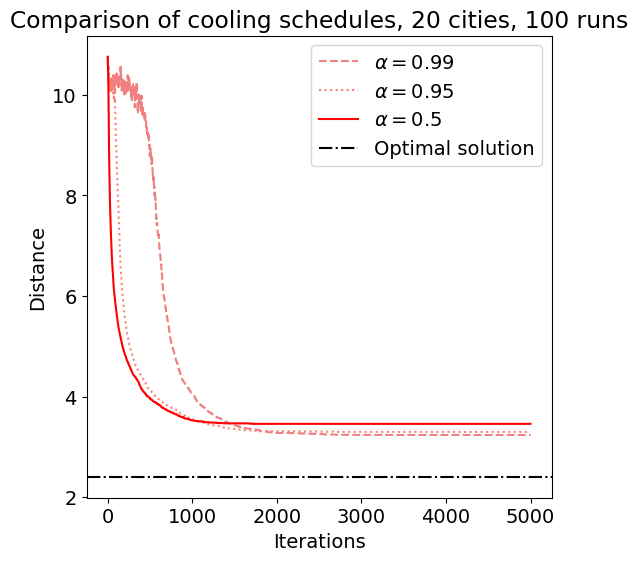

In [376]:
alphas = [0.99,0.95,0.5]
k = 0
color = colorsav[k]
colorav = colorsav[k]
cool_schedule = schedules[k]
cool_name = names[k]
# three shades of red
colors = ['lightcoral', 'salmon', 'red']
# three line styles
linestyles = [ '--', ':','-']

# We plot averages together
plt.figure(figsize=(6, 6))
for i, alpha in enumerate(alphas):
    distances_all_steps = np.loadtxt(f'data/optimization_Ncities={len(cities)}_{cool_name}_alpha={alpha}_runs={num_iterations,}.dat', dtype=float, delimiter=',')
    average_distance = np.mean(distances_all_steps, axis=0)
    plt.plot(range(num_iterations), average_distance, color=colors[i], label=fr'$\alpha =${alpha}', linestyle=linestyles[i])
plt.axhline(y=itinerary_cost(range(N), regular_polygon_vertices(apothem=0.4, num_sides=N, center=(0.5, 0.5))), color='k', linestyle='-.', label = 'Optimal solution')
plt.title(f'Comparison of cooling schedules, {N} cities, {runs} runs')
plt.xlabel('Iterations')
plt.ylabel('Distance')
plt.legend()
plt.savefig(f'figures/optimization_Ncities={len(cities)}_comparison_alpha={alpha}_runs={runs}.png')
plt.show()
plt.close()

[]

In [ ]:
# We plot averages together
plt.figure(figsize=(9, 6))
alphas = [0.95,200,0.3]
for k in range(3) :
    color = colorsav[k]
    colorav = colorsav[k]
    cool_schedule = schedules[k]
    cool_name = names[k]
    alpha = alphas[k]

    #run_optimization(runs, num_iterations, cities, T0, alpha, cool_schedule, cool_name)
    
    distances_all_steps = np.loadtxt(f'data/optimization_Ncities={len(cities)}_{cool_name}_alpha={alpha}_runs={num_iterations,}.dat', dtype=float, delimiter=',')
    average_distance = np.mean(distances_all_steps, axis=0)
    plt.plot(range(num_iterations), average_distance, color=color, label=cool_name)
plt.axhline(y=itinerary_cost(range(N), regular_polygon_vertices(apothem=0.4, num_sides=N, center=(0.5, 0.5))), color='k', linestyle='-.', label = 'Optimal solution')
plt.title(f'Comparison of cooling schedules, {N} cities, {runs} runs')
plt.xlabel('Iterations')
plt.ylabel('Distance')
plt.legend()
plt.savefig(f'figures/optimization_Ncities={len(cities)}_comparison_alpha={alpha}_runs={runs}.png')
plt.close()